In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy, pandas, matplotlib & seaborn packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading CSV File

In [3]:
#Import Csv File
Uber= pd.read_csv("C:/Users/Rohit/Desktop/Uber Request Data.csv",encoding="UTF-8")

### Data Cleaning and Preparation

In [4]:
Uber.shape

(6745, 6)

In [5]:
Uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
#Change Date and Time in proper format
Uber['Request timestamp'] = pd.to_datetime(Uber['Request timestamp'])
Uber['Drop timestamp'] = pd.to_datetime(Uber['Drop timestamp'])
Uber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [8]:
#Add 'Request Hour' and 'Time Slots' Column in Uber DataFrame
Uber['Request Hour'] = Uber['Request timestamp'].dt.hour
Uber['Time Slots'] = pd.cut(Uber['Request Hour'],[-np.inf,3,7,11,15,19,23],labels=['Late Night','Early Morning','Morning','Afternoon','Evening','Night'])
Uber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Time Slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


## TASK 1:-Identification of most pressing problem

### Subtask 1.1:- 
Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'

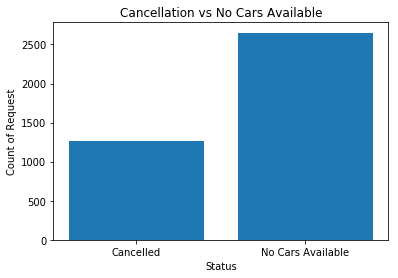

In [9]:
#Graphs Showing the frequency of status of requests(i.e Cancelled, No Cars Available) 
Uber_Groupby_Status=(Uber[Uber['Status']!='Trip Completed'].groupby(['Status'],as_index=False)).count()

plt.title('Cancellation vs No Cars Available')
plt.xlabel('Status')
plt.ylabel('Count of Request')
plt.bar(Uber_Groupby_Status['Status'],Uber_Groupby_Status['Request id'])
plt.show()

### Subtask 1.2:-
Identify the most problematic types of requests (i.e. city to airport / airport to city )

In [10]:
#Create Two Dataframe Uber_Airport & Uber_City (containing data related to pickup point Airport and city respectively)
Uber_Airport=Uber[Uber['Pickup point']=='Airport']
Uber_City=Uber[Uber['Pickup point']=='City']

In [11]:
#Create Two Dataframe having count of request 
Uber_Airport_groupby_Status=(Uber_Airport[Uber_Airport['Status']!='Trip Completed'].groupby(['Status'],as_index=False)).count()
Uber_City_groupby_Status=(Uber_City[Uber_City['Status']!='Trip Completed'].groupby(['Status'],as_index=False)).count()

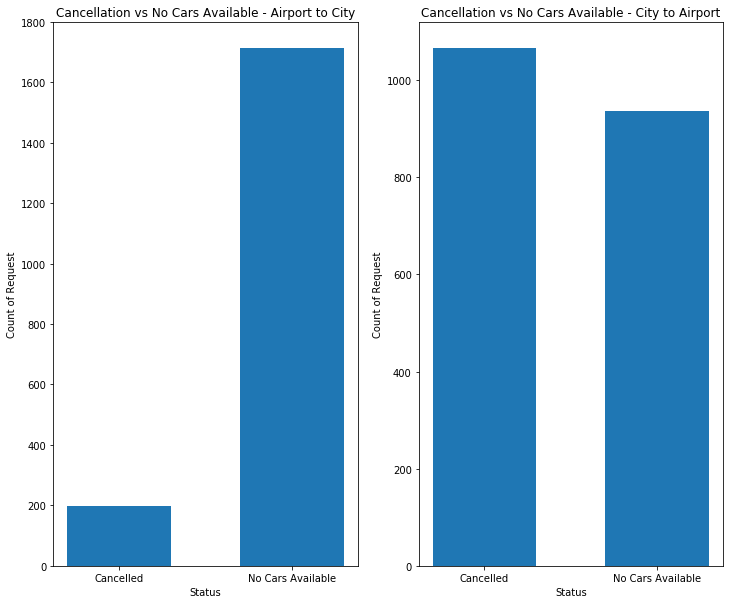

In [12]:
#Create Plot Of Cancellation vs No Cars Available
plt.figure(figsize=(12,10))
width = 0.6

# Create subplot Cancellation vs No Cars Available - Airport to City 
plt.subplot(121)
plt.title('Cancellation vs No Cars Available - Airport to City')
plt.xlabel('Status')
plt.ylabel('Count of Request')
plt.bar(Uber_Airport_groupby_Status['Status'],Uber_Airport_groupby_Status['Request id'],width=width)

# Create subplot Cancellation vs No Cars Available - City to Airport
plt.subplot(122)
plt.title('Cancellation vs No Cars Available - City to Airport')
plt.xlabel('Status')
plt.ylabel('Count of Request')
plt.bar(Uber_City_groupby_Status['Status'],Uber_City_groupby_Status['Request id'],width=width)
plt.show()

### Subtask 1.3:-
Identify the most problematic the time slots (early mornings, late evenings etc.)

In [13]:
#Create Dataframe Uber_Cancelled and Uber_Cars_Unavialable(containing data related to cancelled and unavilable cars respectively)
Uber_Cancelled=Uber[Uber['Status']=='Cancelled']
Uber_Cars_Unavialable=Uber[Uber['Status']=='No Cars Available']

Uber_Cancelled_groupby_Time_Slots=(Uber_Cancelled.groupby(['Time Slots'],as_index=False)).count()
Uber_Cars_Unavialable_groupby_Time_Slots=(Uber_Cars_Unavialable.groupby(['Time Slots'],as_index=False)).count()

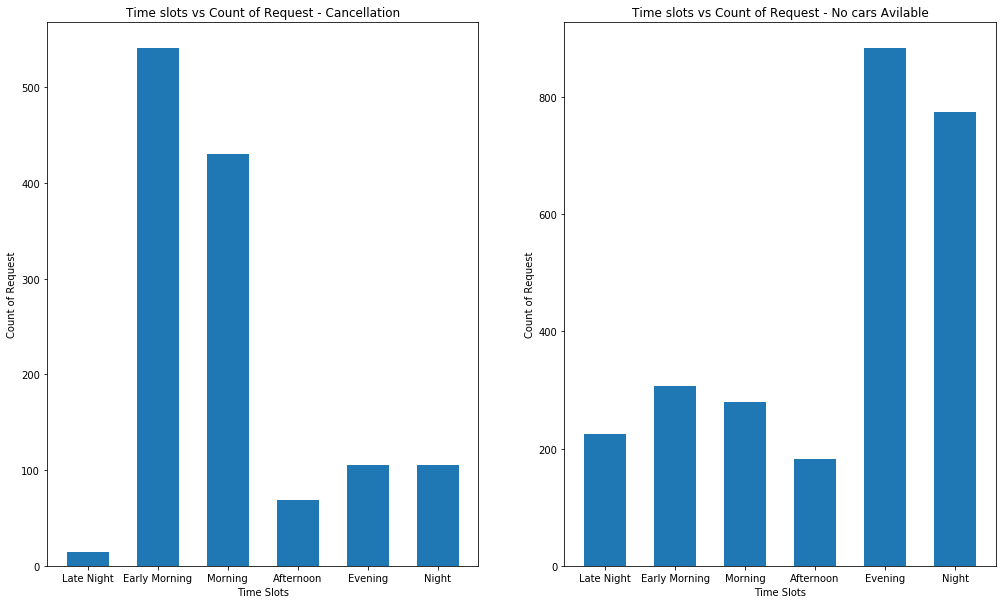

In [14]:
#Create Plot for Time slots vs Count of Request
plt.figure(figsize=(17,10))
width=0.6

# Create subplot Time slots vs Count of Request - Cancellation
plt.subplot(121)
plt.title('Time slots vs Count of Request - Cancellation')
plt.xlabel('Time Slots')
plt.ylabel('Count of Request')
plt.bar(Uber_Cancelled_groupby_Time_Slots['Time Slots'],Uber_Cancelled_groupby_Time_Slots['Request id'],width=width)

# Create subplot Time slots vs Count of Request - Unavailibilty of cars
plt.subplot(122)
plt.title('Time slots vs Count of Request - No cars Avilable')
plt.xlabel('Time Slots')
plt.ylabel('Count of Request')
plt.bar(Uber_Cars_Unavialable_groupby_Time_Slots['Time Slots'],Uber_Cars_Unavialable_groupby_Time_Slots['Request id'],width=width)

plt.show()

## Task 2:-Demand Vs Supply Analysis

### SubTask 2.1:- 
Finding the time slots when the highest gap exists

In [15]:
#Create Column Supply & Gap in Uber Data Frame (for analyzing Demand Supply gap)
Uber['Supply']=np.where(Uber['Status']=='Trip Completed' ,'YES', 'NO')
Uber['Gap']=np.where(Uber['Status']!='Trip Completed' ,'YES', 'NO')

In [16]:
# Create Three Data Frames Uber_Demand, Uber_Supply & Uber_Gap (having data related to demand supply and Gap respectively)
Uber_Demand=Uber
Uber_Supply=Uber[Uber['Supply']=='YES']
Uber_Gap=Uber[Uber['Gap']=='YES']

In [17]:
#Create Three Data Frames having count of Demand, Supply and Gap of Uber Request grouped by Time slots
Uber_Demand_GroupedBy_Time_slot=(Uber_Demand.groupby(['Time Slots'])).count()
Uber_Supply_GroupedBy_Time_slot=(Uber_Supply.groupby(['Time Slots'])).count()
Uber_Gap_GroupedBy_Time_slot=(Uber_Gap.groupby(['Time Slots'])).count()

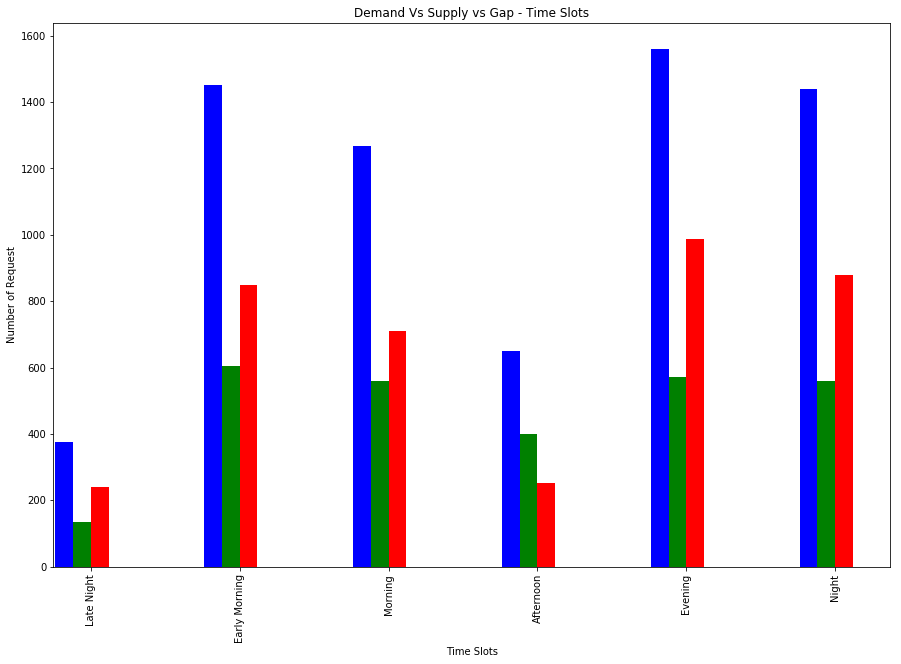

In [18]:
# Create Plot Showing demand supply and gap for different time slots
plt.figure(figsize=(15,10))
width=0.12

plt.title('Demand Vs Supply vs Gap - Time Slots')
plt.xlabel('Time Slots')
plt.ylabel('Number of Request')
Uber_Demand_GroupedBy_Time_slot['Request id'].plot(kind='bar', color='blue',  width=width, position=2)
Uber_Supply_GroupedBy_Time_slot['Supply'].plot(kind='bar', color='green',  width=width, position=1)
Uber_Gap_GroupedBy_Time_slot['Gap'].plot(kind='bar', color='red',  width=width, position=0)

plt.show()

### SubTask 2.2:- 
Finding the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

In [19]:
#Create 3 Data Frames having count of Demand, Supply and Gap of Uber Request from Airport to City 
Uber_Demand_Airport=(Uber_Demand[Uber_Demand['Pickup point']=='Airport'].groupby(['Time Slots'])).count()
Uber_Supply_Airport=(Uber_Supply[Uber_Supply['Pickup point']=='Airport'].groupby(['Time Slots'])).count()
Uber_Gap_Airport=(Uber_Gap[Uber_Gap['Pickup point']=='Airport'].groupby(['Time Slots'])).count()

In [20]:
#Create 3 Data Frames having count of Demand, Supply and Gap of Uber Request from City to Airport 
Uber_Demand_City=(Uber_Demand[Uber_Demand['Pickup point']=='City'].groupby(['Time Slots'])).count()
Uber_Supply_City=(Uber_Supply[Uber_Supply['Pickup point']=='City'].groupby(['Time Slots'])).count()
Uber_Gap_City=(Uber_Gap[Uber_Gap['Pickup point']=='City'].groupby(['Time Slots'])).count()

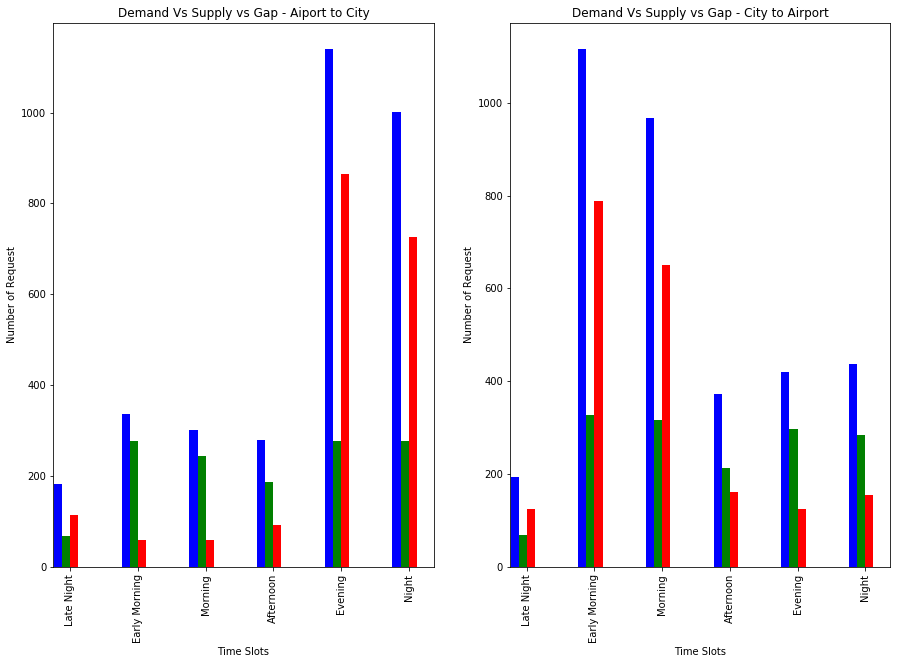

In [21]:
# Create Plot Showing for different type of request(Airport-City or City-Airport)
plt.figure(figsize=(15,10))
width=0.12

#Create Subplot 'Demand Vs Supply vs Gap - Aiport to City'
plt.subplot(121)
plt.title('Demand Vs Supply vs Gap - Aiport to City')
plt.xlabel('Time Slots')
plt.ylabel('Number of Request')
Uber_Demand_Airport['Request id'].plot(kind='bar', color='blue',  width=width, position=2)
Uber_Supply_Airport['Supply'].plot(kind='bar', color='green',  width=width, position=1)
Uber_Gap_Airport['Gap'].plot(kind='bar', color='red',  width=width, position=0)

#Create Subplot 'Demand Vs Supply vs Gap - City to Airport'
plt.subplot(122)
plt.title('Demand Vs Supply vs Gap - City to Airport')
plt.xlabel('Time Slots')
plt.ylabel('Number of Request')
Uber_Demand_City['Request id'].plot(kind='bar', color='blue',  width=width, position=2)
Uber_Supply_City['Supply'].plot(kind='bar', color='green',  width=width, position=1)
Uber_Gap_City['Gap'].plot(kind='bar', color='red',  width=width, position=0)

plt.show()